# Neural Network

The input of the neural network is
$x \in \mathbb{R}^{k_0 \times 1}$

The output of the $l^{th}$ layer is defined as
$a^l = \sigma(z^l)$

being 
$z^l = w^l a^{l-1} + b^l, w^l \in \mathbb{R}^{k_l \times k_{l-1}}$

where
$a^0 = x$

and $k_l$ is the dimension of the output vector from the $l^{th}$ layer.

The output of the last layer is $a^L$.

# Cost function

The cost function sets the objective that the network must learn. Is a function $C(w, x, y) \ge 0$ and
$C \to 0$ when the network performs good.

For example, the $L_2$ norm can be a cost function: 

$C(w, x, y) = \frac{1}{n} \sum_{i=0}^n \lVert a^L(x^{(i)}) - y^{(i)} \rVert$ where $x^{(i)}$ is the $i^{th}$ sample from the training set and $y^{(i)}$ is it's corresponding expected output.

# Gradient

$w^l_{ij}$ is the entry in the $i^{th}$ row and $j^{th}$ column from weight matrix that belongs to the $l^{th}$ layer.

We need to compute the gradient of the cost function w.r.t the $w$ and $b$ parameters, that is

$\nabla_w C = [\partial C / \partial w^0_{00} \ldots \partial C / \partial w^0_{k_1 k_0} \ldots \partial C / \partial w^L_{k_L k_{L-1}}]$

## Gradient in the last layer

Let's start with the partial derivative of a weight in the last layer, that is $\partial C / \partial w^L_{ij}$.

By using the chain rule we get

$\frac{\partial C}{\partial w^L_{ij}} = \frac{\partial C}{\partial z^L_{i}} \frac{\partial z^L_{i}}{\partial w^L_{ij}}$

and define $\delta^l_i = \frac{\partial C}{\partial z^l_{i}}$

$z^L_i = \sum_{j=0}^{k_L} w^L_{ij} a^{L-1}_j + b_i$

$\frac{\partial z^L_i}{\partial w_{ij}} = a^{L-1}_j$

then $\frac{\partial C}{\partial w^L_{ij}} = \delta^L_i a^{L-1}_j$

If we write all the partial derivatives for $w^L_{ij}$ we get a matrix of the same shape as $w^l$ which can be written in the following vectorized expression (calling it $\partial C / \partial w^L$):

$\partial C / \partial w^L = \begin{bmatrix}
\delta^L_0 a^{L-1}_0 & \delta^L_0 a^{L-1}_1 \ldots \delta^L_0 a^{L-1}_{k^{L-1}}\\
\delta^L_1 a^{L-1}_0 & \delta^L_1 a^{L-1}_1 \ldots \delta^L_1 a^{L-1}_{k^{L-1}}\\
\ldots\\
\delta^L_{k^L} a^{L-1}_0 & \delta^L_0 a^{L-1}_1 \ldots \delta^L_{k^L} a^{L-1}_{k^{L-1}}
\end{bmatrix} =
\begin{bmatrix} \delta^L_0\\ \delta^L_1\\ \ldots\\ \delta^L_{k^L} \end{bmatrix}
\begin{bmatrix} a^L_0 & a^L_1 & \ldots & a^L_{k^{L-1}} \end{bmatrix} = \delta^L ({a^{L-1}})^T$

Now doing it for $b$ we have

$\frac{\partial C}{\partial b^L_i} = \frac{\partial C}{\partial z^L_{i}} \frac{\partial z^L_{i}}{\partial b^L_{i}}
= \frac{\partial C}{\partial z^L_{i}} 1 = \delta^L_i$

or just $\frac{\partial C}{\partial b^L} = \delta^L$

## Gradient for the next layer

We need to find an expression for $\partial C / \partial w^{L-1}_{ij}$

In this case we note that a neuron in the $L-1$ layer affects all of the neurons in the next layer, so we need to take into account
that by summing along all their partial derivatives.

$\frac{\partial C}{\partial w^{L-1}_{ij}} = \sum_{q=0}^{k_L} \frac{\partial C}{\partial z^{L}_{q}} \frac{\partial z^L_q}{\partial z^{L-1}_{i}}
 \frac{\partial z^{L-1}_i}{\partial w^{L-1}_{ij}}$
 
$\frac{\partial z^L_q}{\partial z^{L-1}_{i}} = \frac{\partial z^L_q}{\partial a^{L-1}_{i}} \frac{\partial a^{L-1}_i}{\partial z^{L-1}_{i}} = 
w^{L}_{qi} \sigma'_i$

so then the gradient for the weights in the layer $L-1$ is

$\frac{\partial C}{\partial w^{L-1}_{ij}} = \sum_{q=0}^{k_L}\delta^L_q w^{L}_{qi} \sigma'_i a^{L-1}_j = 
\sigma'_i a^{L-2}_j \sum_{q=0}^{k_L}\delta^L_q w^{L}_{qi}$

if we write $w^{L}_{qi} = (w^{L}_{iq})^T$ then

$\frac{\partial C}{\partial w^{L-1}} = (w^{L})^T \delta^L (a^{L-2})^T \odot \sigma'(z^{L-1}) $

noting that $\delta^{L-1} = \frac{\partial C}{\partial z^{L-1}} = (w^{L})^T \delta^L \odot \sigma'(z^{L-1})$

$\frac{\partial C}{\partial w^{L-1}} = \delta^{L-1} (a^{L-2})^T$

while for $b^{L-1}$ the gradient is

$\frac{\partial C}{\partial b^{L-1}} = \delta^{L-1}$

## Gradient in any layer

We now see the gradient's pattern:

$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)$

$\frac{\partial C}{\partial w^l} = \delta^l (a^{l-1})^T$

$\frac{\partial C}{\partial b^l} = \delta^l$

# Softmax classifier

The sofmax function is defined as $s(z_i)=\frac{e^{z_i}}{\sum_j e^{z_j}}$

If the last layer on a neural network has $\sigma(z) = s(z)$ we could use the following cost function:

$C = \sum_{i=0}^n \sum_{j=0}^{k_L} -log(a^L_j(x^{(i)})) y^{(i)}_j$

with the $log$ function being applied element wise.

Considering that all the elements in $y^{(i)}$ are 0, except for the one corresponding to the class label we have

$\frac{\partial C}{\partial z^L_i} =
- \sum_{i=0}^n \sum_{j=0}^{k_L} \sum_{q=0}^{k_L} \frac{\partial}{\partial z^L_q} log(s_j(z^{(i)})) y^{(i)}_j$

There are 2 options: either $y^{(i)}_j$ is 0 or 1. When is $y^{(i)}_j = 0$, the gradient is zero aswell. This leaves us with only the is $z^{(i)}_j$ where $y^{(i)}_j = 1$. 

So for any $y^{(i)}$, there are 2 cases: either $q=j$, i.e. we are deriving on the output corresponding to the correct class or $q \ne j$, in which case it's the output corresponding to the other clases.

$\frac{\partial}{\partial z^L_q} log(s_j(z)) = \frac{\partial}{\partial z^L_q} log(e^{z_j})-\frac{\partial}{\partial z^L_q}log(\sum_p e^{z_p}) =
0 - \frac{1}{\sum_p e^{z_p}} \frac{\partial}{\partial z^L_q}\sum_p e^{z_p} = - \frac{1}{\sum_p e^{z_p}} \frac{\partial}{\partial z^L_q}e^{z_q} = - s(z^L)$

But when the derivation is on the $z^L_j$ (the one that corresponds to the expected output class):

$\frac{\partial}{\partial z^L_j} log(s_j(z)) = \frac{\partial}{\partial z^L_j} log(e^{z_j})-\frac{\partial}{\partial z^L_j}log(\sum_p e^{z_p}) =
1 - \frac{1}{\sum_p e^{z_p}} \frac{\partial}{\partial z^L_j}\sum_p e^{z_p} = 1 - \frac{1}{\sum_p e^{z_p}} \frac{\partial}{\partial z^L_j}e^{z_j} = 1 - s(z^L)$

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = (8, 8)

In [199]:
def swirl_gen(n, scale=1, noise=0.65, elems=None):
    elems = elems or n * 80
    # randomly selects the class
    labels = np.random.randint(0, n, elems)
    # gets the angle (from the class) and radius
    angle = (2 * np.pi * labels) / n
    radius = np.random.rand(elems) * scale + scale / 20
    # adds more angle when further from the origin
    angle += (radius / scale) * np.pi
    # adds some noise
    angle += np.random.rand(elems) * noise
    # converts to standard coordinates
    coords = np.vstack((radius * np.cos(angle), radius * np.sin(angle)))
    return (coords, labels)

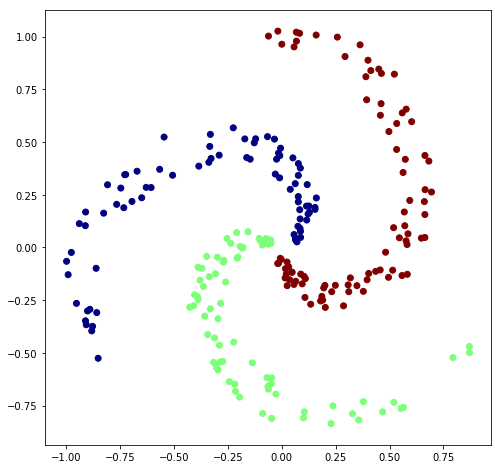

In [200]:
n = 3
p, labels = swirl_gen(n=n)
plt.scatter(*p, c=labels, cmap='jet')

In [554]:
def softmax(z):
    """Softmax activation."""
    exp = np.exp(z - np.max(z, axis=0))
    return exp / np.sum(exp, axis=0)

In [553]:
def ReLU(z):
    """ReLU activation."""
    return np.maximum(z, 0, z)

In [555]:
# softmax test
z = np.asarray([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]).reshape(5, 2)
r = softmax(z)
print(r)
sum(r)

[[0.01165623 0.01165623]
 [0.03168492 0.03168492]
 [0.08612854 0.08612854]
 [0.23412166 0.23412166]
 [0.63640865 0.63640865]]


array([1., 1.])

In [558]:
def feedforward(x):
    """Given a batch of inputs `x` computes the predictions of the neural network."""

    z1 = np.dot(w1, x)
    a1 = ReLU(z1)

    z2 = np.dot(w2, a1)
    a2 = ReLU(z2)

    z3 = np.dot(w3, a2)
    return z1, a1, z2, a2, z3, softmax(z3)

In [589]:
def cost(z, y):
    """Given a batch of predictions `a` from the neural network and the corresponding labels `y`,
    computs the total cost/loss."""
    
    exp = np.exp(z - np.max(z, axis=0))
    expsum = np.sum(exp, axis=0)
    exp = exp.T[range(len(y)), y]
    return -np.sum(np.log(exp) - np.log(expsum))
    
    # gets the elements that correspond to the class for each output vector
    a = a.T[range(len(y)), y]
    # applies logarithm and sums them all
    return -np.sum(np.log(a))

In [617]:
def finite_differences(dx, x, f, i, epsilon):
    v = x.flat[i]

    x.flat[i] = v - epsilon
    c1 = f(x)

    x.flat[i] = v + epsilon
    c2 = f(x)

    x.flat[i] = v
    return (c2 - c1) / (2 * epsilon)

def gradient_check(dx, x, f, epsilon=1e-8):
    """Calculates the gradient of `f` w.r.t `x` using finite differences and compares it
    against the given gradient `dx`."""

    for i in range(len(x.flat)):
        numeric_grad = finite_differences(dx, x, f, i, epsilon)
        if numeric_grad != 0 and dx.flat[i] != 0:
            rel_error = abs(dx.flat[i] - numeric_grad) / (dx.flat[i] + numeric_grad)
            assert rel_error < 1e-5, 'relative error of %.8f in %d: ana=%.10f num=%.10f' % (rel_error, i, dx.flat[i], numeric_grad)

In [619]:
def backprop(x, y):
    """Backpropagation algorithm."""

    num_samples = x.shape[1]
    z1, a1, z2, a2, z3, a3 = feedforward(x)

    # gradient w.r.t. the cost function
    dz3 = np.copy(a3)
    dz3.T[range(a3.shape[1]), y] -= 1

    # gradient for layer 3 weights
    dw3 = np.dot(dz3, a2.T)

    # backwards pass to layer 2 and gradient for weights in layer 2
    dz2 = np.dot(w3.T, dz3)
    dw2 = np.dot(dz2, a1.T)

    dz1 = np.dot(w2.T, dz2)
    dw1 = np.dot(dz1, x.T)

    #epsilons, rel_error = np.linspace(1e-15, 1e-1, 5000), []
    #for epsilon in epsilons:
    #    i = 18
    #    d = finite_differences(dw3, w3, lambda w3: cost(softmax(np.dot(w3, a2)), y), i, epsilon)
    #    rel_error.append(abs(dw3.flat[i] - d) / (dw3.flat[i] + d))
    #plt.loglog(epsilons, rel_error)
    #plt.show()

    #gradient_check(dz3, z3, lambda z3: cost(softmax(z3), y))
    #gradient_check(dw3, w3, lambda w3: cost(np.dot(w3, a2), y))
    #gradient_check(dz2, z2, lambda z2: cost(softmax(np.dot(w3, ReLU(z2))), y))
    #gradient_check(dw2, w2, lambda w2: cost(softmax(np.dot(w3, np.dot(w2, a2))), y))
    #gradient_check(dz1, z1, lambda z1: cost(softmax(np.dot(w3, np.dot(w2, ReLU(z1)))), y))
    #gradient_check(dw1, w1, lambda w1: cost(softmax(np.dot(w3, np.dot(w2, ReLU(np.dot(w1, x))))), y))

    return dw1, dw2, dw3

In [579]:
def gradient_descent(epochs, lr, w1, w2, w3, x, y):
    """Runs gradient descent `epochs` times on the given weights `w1`, `w2`, `w3` with learning rate `lr`
    for the input samples `x` and corresponding labels `y`."""

    c = []
    for i in range(epochs):
        # computes the current cost
        c.append(cost(feedforward(x)[-2], y))
        # gets the gradient
        dw1, dw2, dw3 = backprop(x, y)
        # does gradient check
        #if i % 100 == 0:
        #    gradient_check(dw1, w1, lambda _: cost(feedforward(x)[-1], y))
        #    gradient_check(dw2, w2, lambda _: cost(feedforward(x)[-1], y))
        # does one GD step
        w1 -= dw1 * lr
        w2 -= dw2 * lr
        w3 -= dw3 * lr
    return c

In [618]:
np.random.seed(0)
# creates the weights of 2 layers
w1, w2, w3 = np.random.randn(200, 2) * 0.01, np.random.randn(100, 200) * 0.01, np.random.randn(n, 100) * 0.01
# trains the network
plt.plot(gradient_descent(50, 0.00025, w1, w2, w3, p, labels))

AssertionError: relative error of 0.00016927 in 0: ana=0.0025911825 num=0.0025920599

In [564]:
predictions = np.argmax(feedforward(p)[-1], axis=0)
hits = np.sum(predictions == labels)
print('accuracy: ', hits / labels.shape[0])

accuracy:  0.5791666666666667
